# FFT Analysis

This notebook is meant for analysing `.wav` samples with Python. The `preview` function allows easy inspection of audio files by plotting graphs of amplitude against time and frequency.

### ⚠️ Volume Warning
You should turn down your volume if you are wearing headphones.

In [1]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import rfft, rfft2, rfftfreq
from scipy.io import wavfile

In [2]:
# plot amplitude against time and amplitude against frequency graphs
def preview(
    filename,
    bits_per_sample=8,
    amplitude_range=(0, 1000),
    frequency_range=(0, 1000),
):
    display.display(display.Audio(filename))

    sample_rate, data = wavfile.read(filename)
    num_samples = len(data)
    num_channels = 1 if len(data.shape) == 1 else data.shape[1]
    duration = num_samples / sample_rate

    x1 = np.linspace(0, duration, num_samples, endpoint=False)
    y1 = (data / 255 * 2 - 1) if bits_per_sample == 8 else data / 32768 # normalize values

    x2 = rfftfreq(num_samples, 1 / sample_rate)
    y2 = rfft2(y1) if num_channels == 2 else rfft(y1)

    # amplitude against time
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.title("Amplitude against Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized amplitude")
    plt.axhline(0, linestyle='--').set_color('black')
    begin, end = amplitude_range 
    plt.plot(x1[begin: end], y1[begin:end])

    # amplitude against frequency bins
    plt.subplot(1, 2, 2)
    plt.title("Amplitude against Frequency")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Normalized amplitude")
    begin, end = frequency_range 
    plt.plot(x2[begin:end], np.abs(y2[begin:end]))

    plt.show()

### 8-bit Audio

`samples/8-bit.wav` is an 8-bit audio file with a pure tone of A4 (440 Hz).

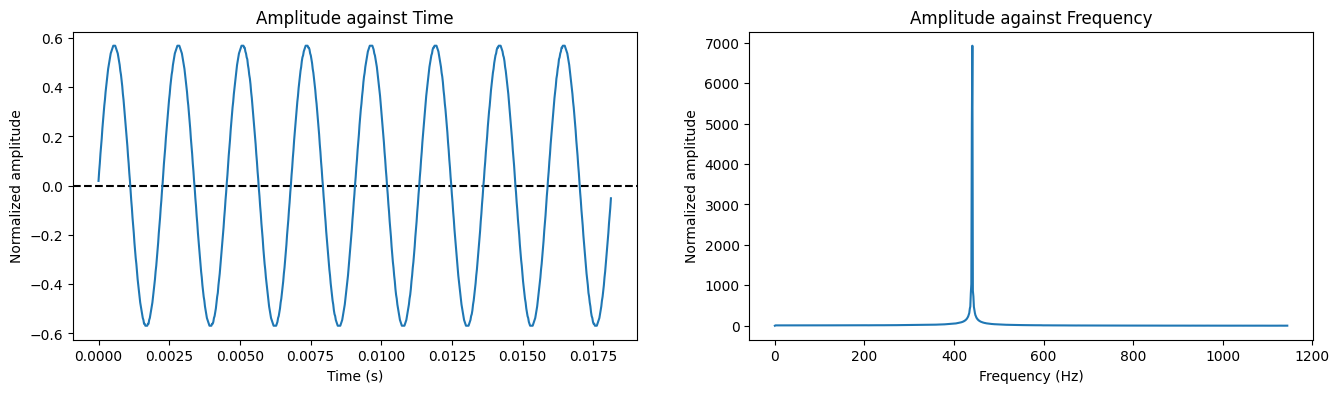

In [3]:
preview("samples/8-bit/a.wav", amplitude_range=(0, 800))

Shifted by +0 step(s):


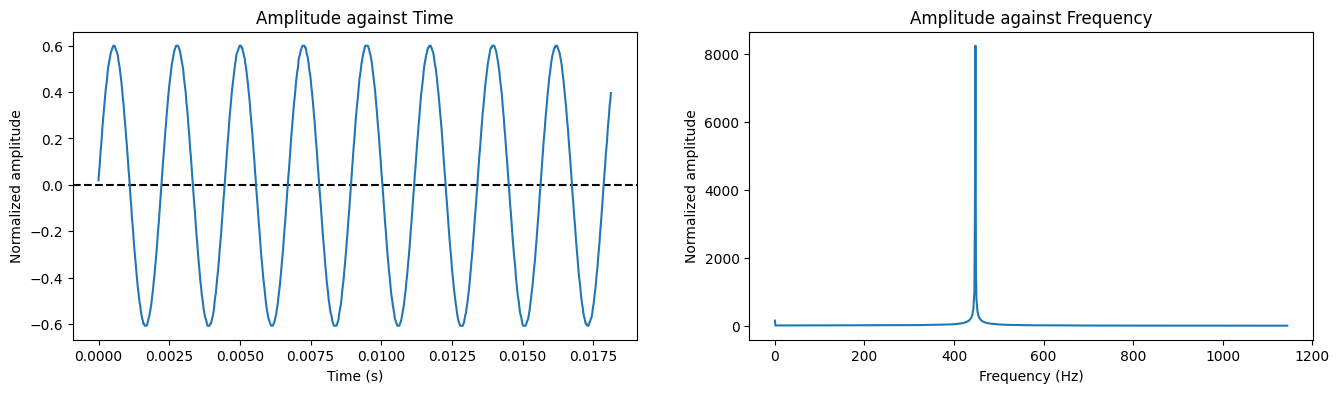

Shifted by +1 step(s):


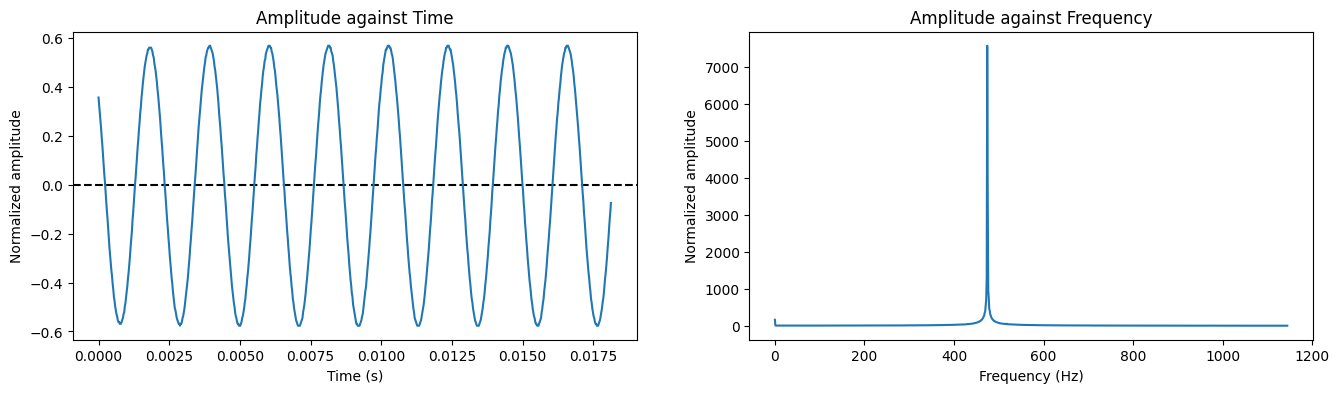

Shifted by +2 step(s):


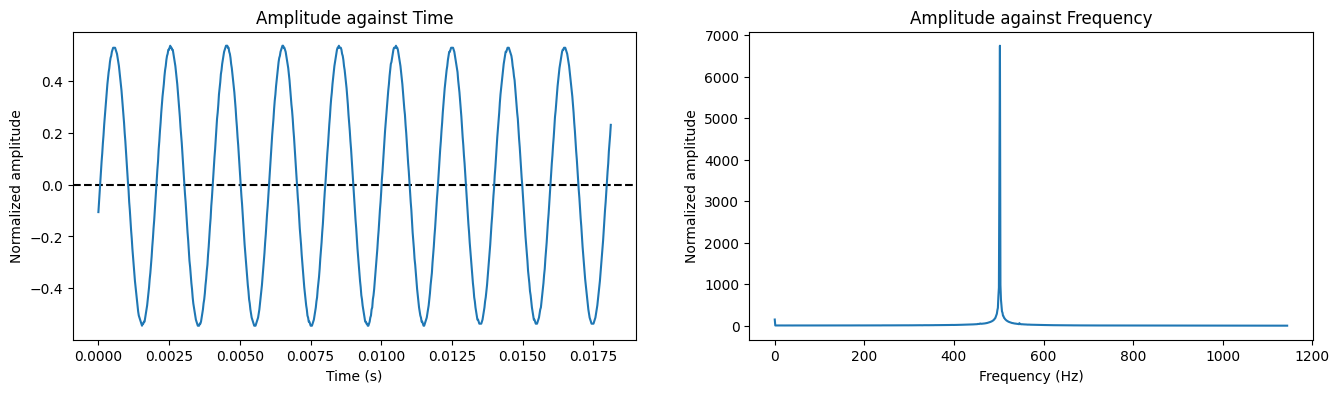

Shifted by -1 step(s):


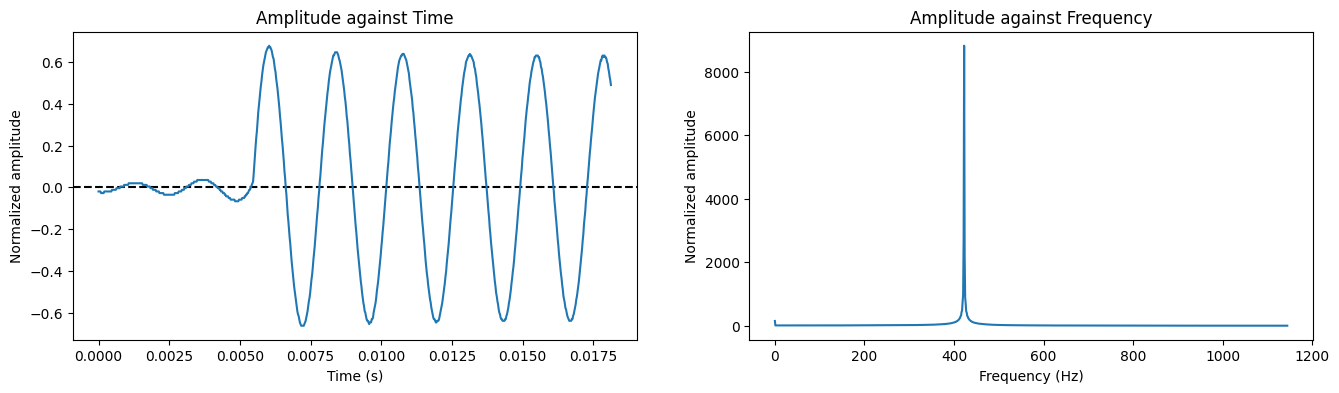

Shifted by -2 step(s):


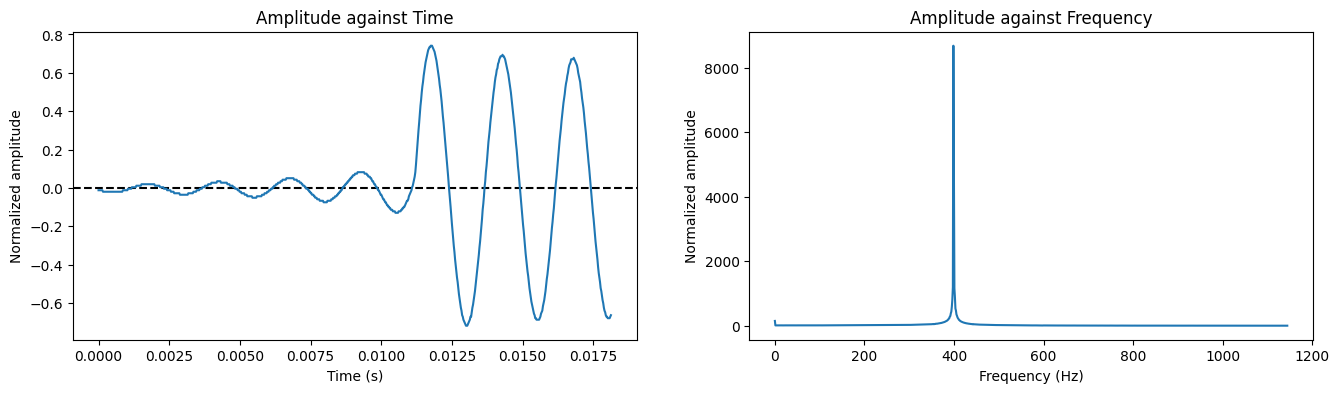

In [4]:
for file in os.listdir("demo/8-bit"):
    if len(file) == 7:
        print(f"Shifted by {file[1:3]} step(s):")
        preview(f"demo/8-bit/{file}", amplitude_range=(0, 800))

### 16-bit Audio

`samples/16-bit.wav` is a 16-bit audio file with a pure tone of A5 (880 Hz). The performance is considerably worse than the 8 bit version.

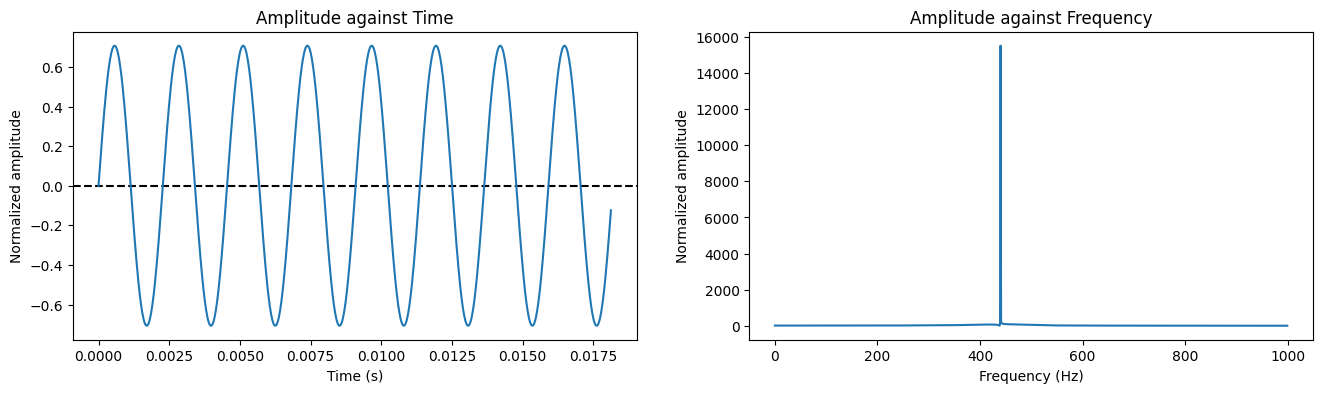

In [5]:
preview("samples/16-bit/a.wav", bits_per_sample=16, amplitude_range=(0, 800))

Shifted by +0 step(s):


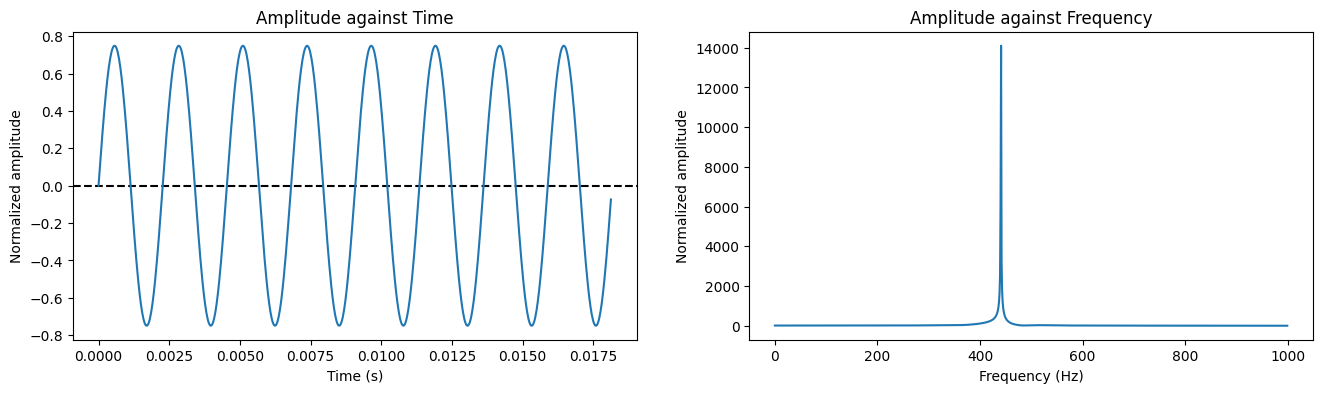

Shifted by +1 step(s):


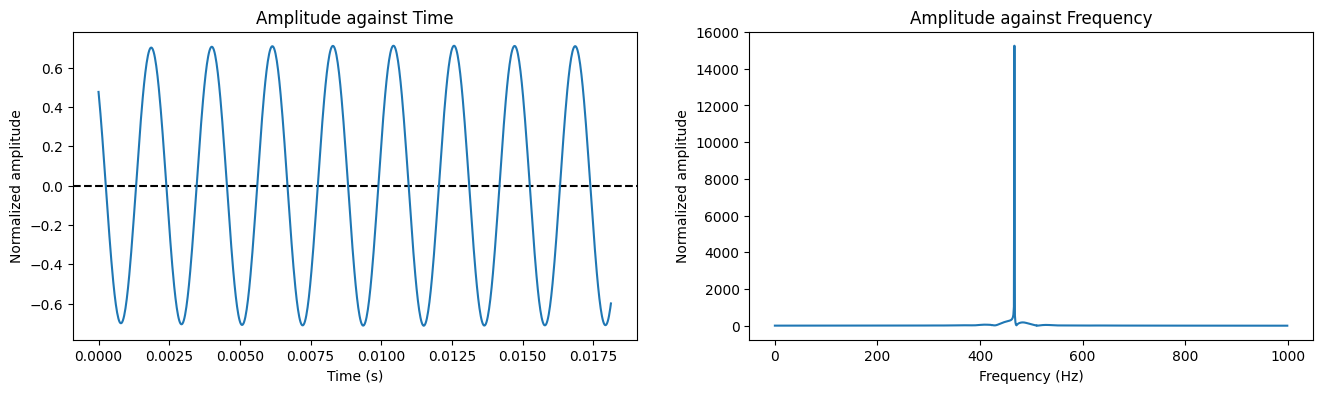

Shifted by -1 step(s):


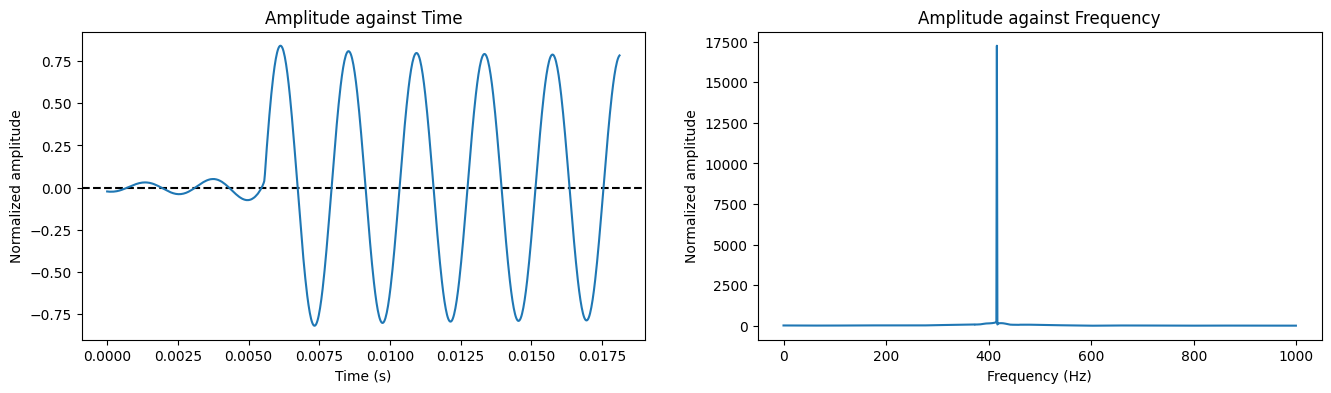

In [6]:
for file in os.listdir("demo/16-bit"):
    if len(file) == 7:
        print(f"Shifted by {file[1:3]} step(s):")
        preview(f"demo/16-bit/{file}", bits_per_sample=16, amplitude_range=(0, 800))

### Instrument Audio

Instrument audio tends to be more complex. Suprisingly, `windigo` is still able to handle these files decently!

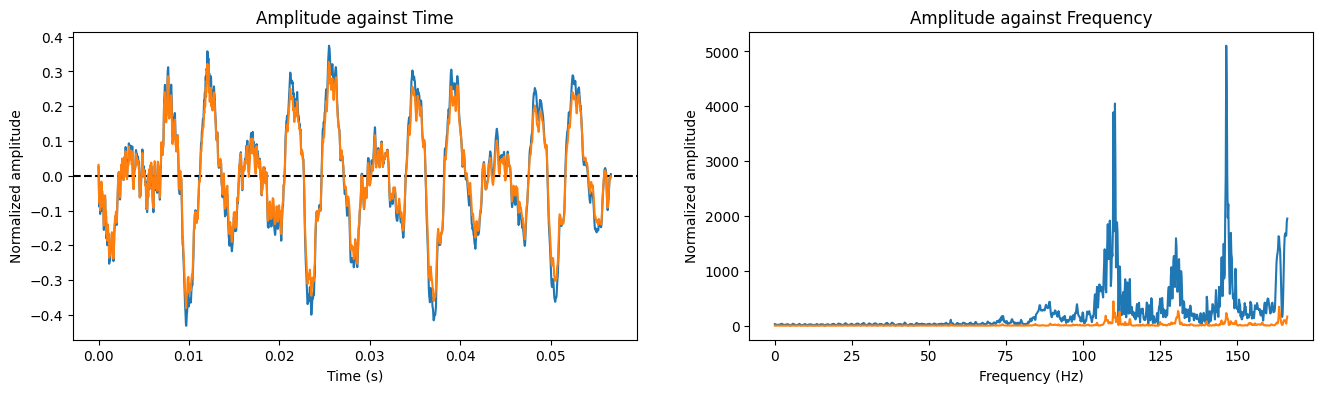

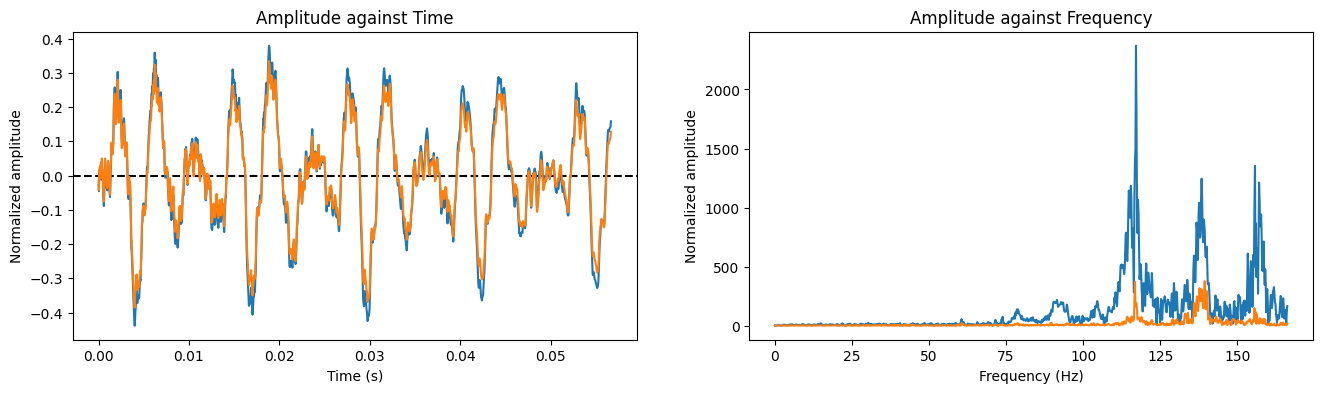

In [7]:
preview("samples/16-bit/acoustic-guitar.wav", bits_per_sample=16, amplitude_range=(0, 2500))
preview("demo/16-bit/acoustic-guitar+1.wav", bits_per_sample=16, amplitude_range=(0, 2500))

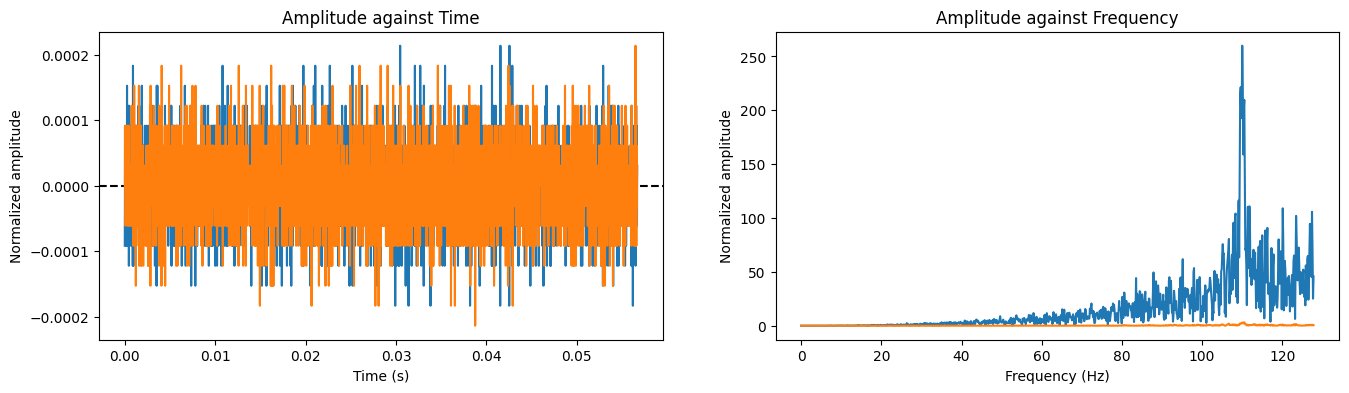

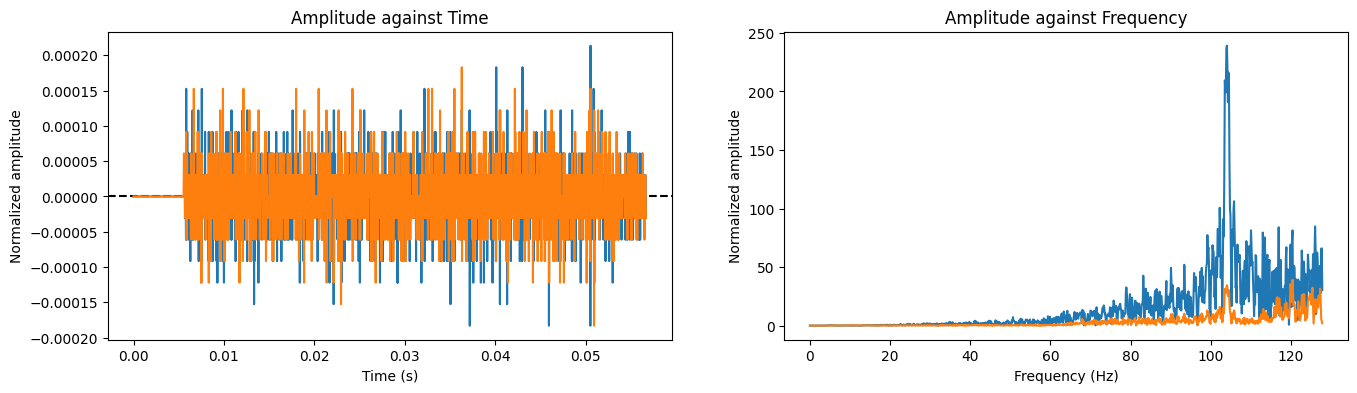

In [8]:
preview("samples/16-bit/clean-guitar.wav", bits_per_sample=16, amplitude_range=(0, 2500))
preview("demo/16-bit/clean-guitar-1.wav", bits_per_sample=16, amplitude_range=(0, 2500))